In [1]:
import pandas as pd
import warnings; warnings.filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('titanic_train.csv', encoding='cp949')
train

,승객ID,생존여부,객실등급,성별,나이,동반_형제자매배우자,동반_부모자식,티켓가격,이름,티켓번호,객실번호,탑승항구
0,1,0,3,남자,22.0,1,0,7.2500,"Braund, Mr. Owen Harris",A/5 21171,NaN,S
1,2,1,1,여자,38.0,1,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,C
2,3,1,3,여자,26.0,0,0,7.9250,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,S
3,4,1,1,여자,35.0,1,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,S
4,5,0,3,남자,35.0,0,0,8.0500,"Allen, Mr. William Henry",373450,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,남자,27.0,0,0,13.0000,"Montvila, Rev. Juozas",211536,NaN,S
887,888,1,1,여자,19.0,0,0,30.0000,"Graham, Miss. Margaret Edith",112053,B42,S
888,889,0,3,여자,NaN,1,2,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",W./C. 6607,NaN,S
889,890,1,1,남자,26.0,0,0,30.0000,"Behr, Mr. Karl Howell",111369,C148,C


*scikit-learn은 class(y)와 feature(X)로 데이터의 열이 구분되어야 한다.*

In [4]:
y_train = train.생존여부 #타깃값으로
X_train = train[['객실등급', '성별', '동반_형제자매배우자', '동반_부모자식', '티켓가격']] #특성값으로 
X_train

#y가 소문자인 이유: 벡터라서, X가 대문자인 이유: 종속변수들의 집합이어서 →매트릭스

,객실등급,성별,동반_형제자매배우자,동반_부모자식,티켓가격
0,3,남자,1,0,7.2500
1,1,여자,1,0,71.2833
2,3,여자,0,0,7.9250
3,1,여자,1,0,53.1000
4,3,남자,0,0,8.0500
...,...,...,...,...,...
886,2,남자,0,0,13.0000
887,1,여자,0,0,30.0000
888,3,여자,1,2,23.4500
889,1,남자,0,0,30.0000


*모든 feature는 숫자이어야 한다.*

In [5]:
X_train.성별 = X_train.성별.map({'여자':0, '남자':1})

#feature 내 문자들을 숫자로 바꿔주는 작업 = 인코딩 (정규화??)



In [6]:
X_train

#인코딩됐다

,객실등급,성별,동반_형제자매배우자,동반_부모자식,티켓가격
0,3,1,1,0,7.2500
1,1,0,1,0,71.2833
2,3,0,0,0,7.9250
3,1,0,1,0,53.1000
4,3,1,0,0,8.0500
...,...,...,...,...,...
886,2,1,0,0,13.0000
887,1,0,0,0,30.0000
888,3,0,1,2,23.4500
889,1,1,0,0,30.0000


### 이 상태로 돌리면 무수히 많은 경우가 나온다. 이를 알고리즘 혹은 모델이라고 함

#### 모형 생성 - 의사결정나무(Decision Tree)
<img align="left" src='http://drive.google.com/uc?export=view&id=1OZmnohHM8_932fiNnokTRdC6ZQumrPeL'/>

In [11]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier( random_state=0) #max_depth: 트리의 최대 깊이 설정할 수 있음
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

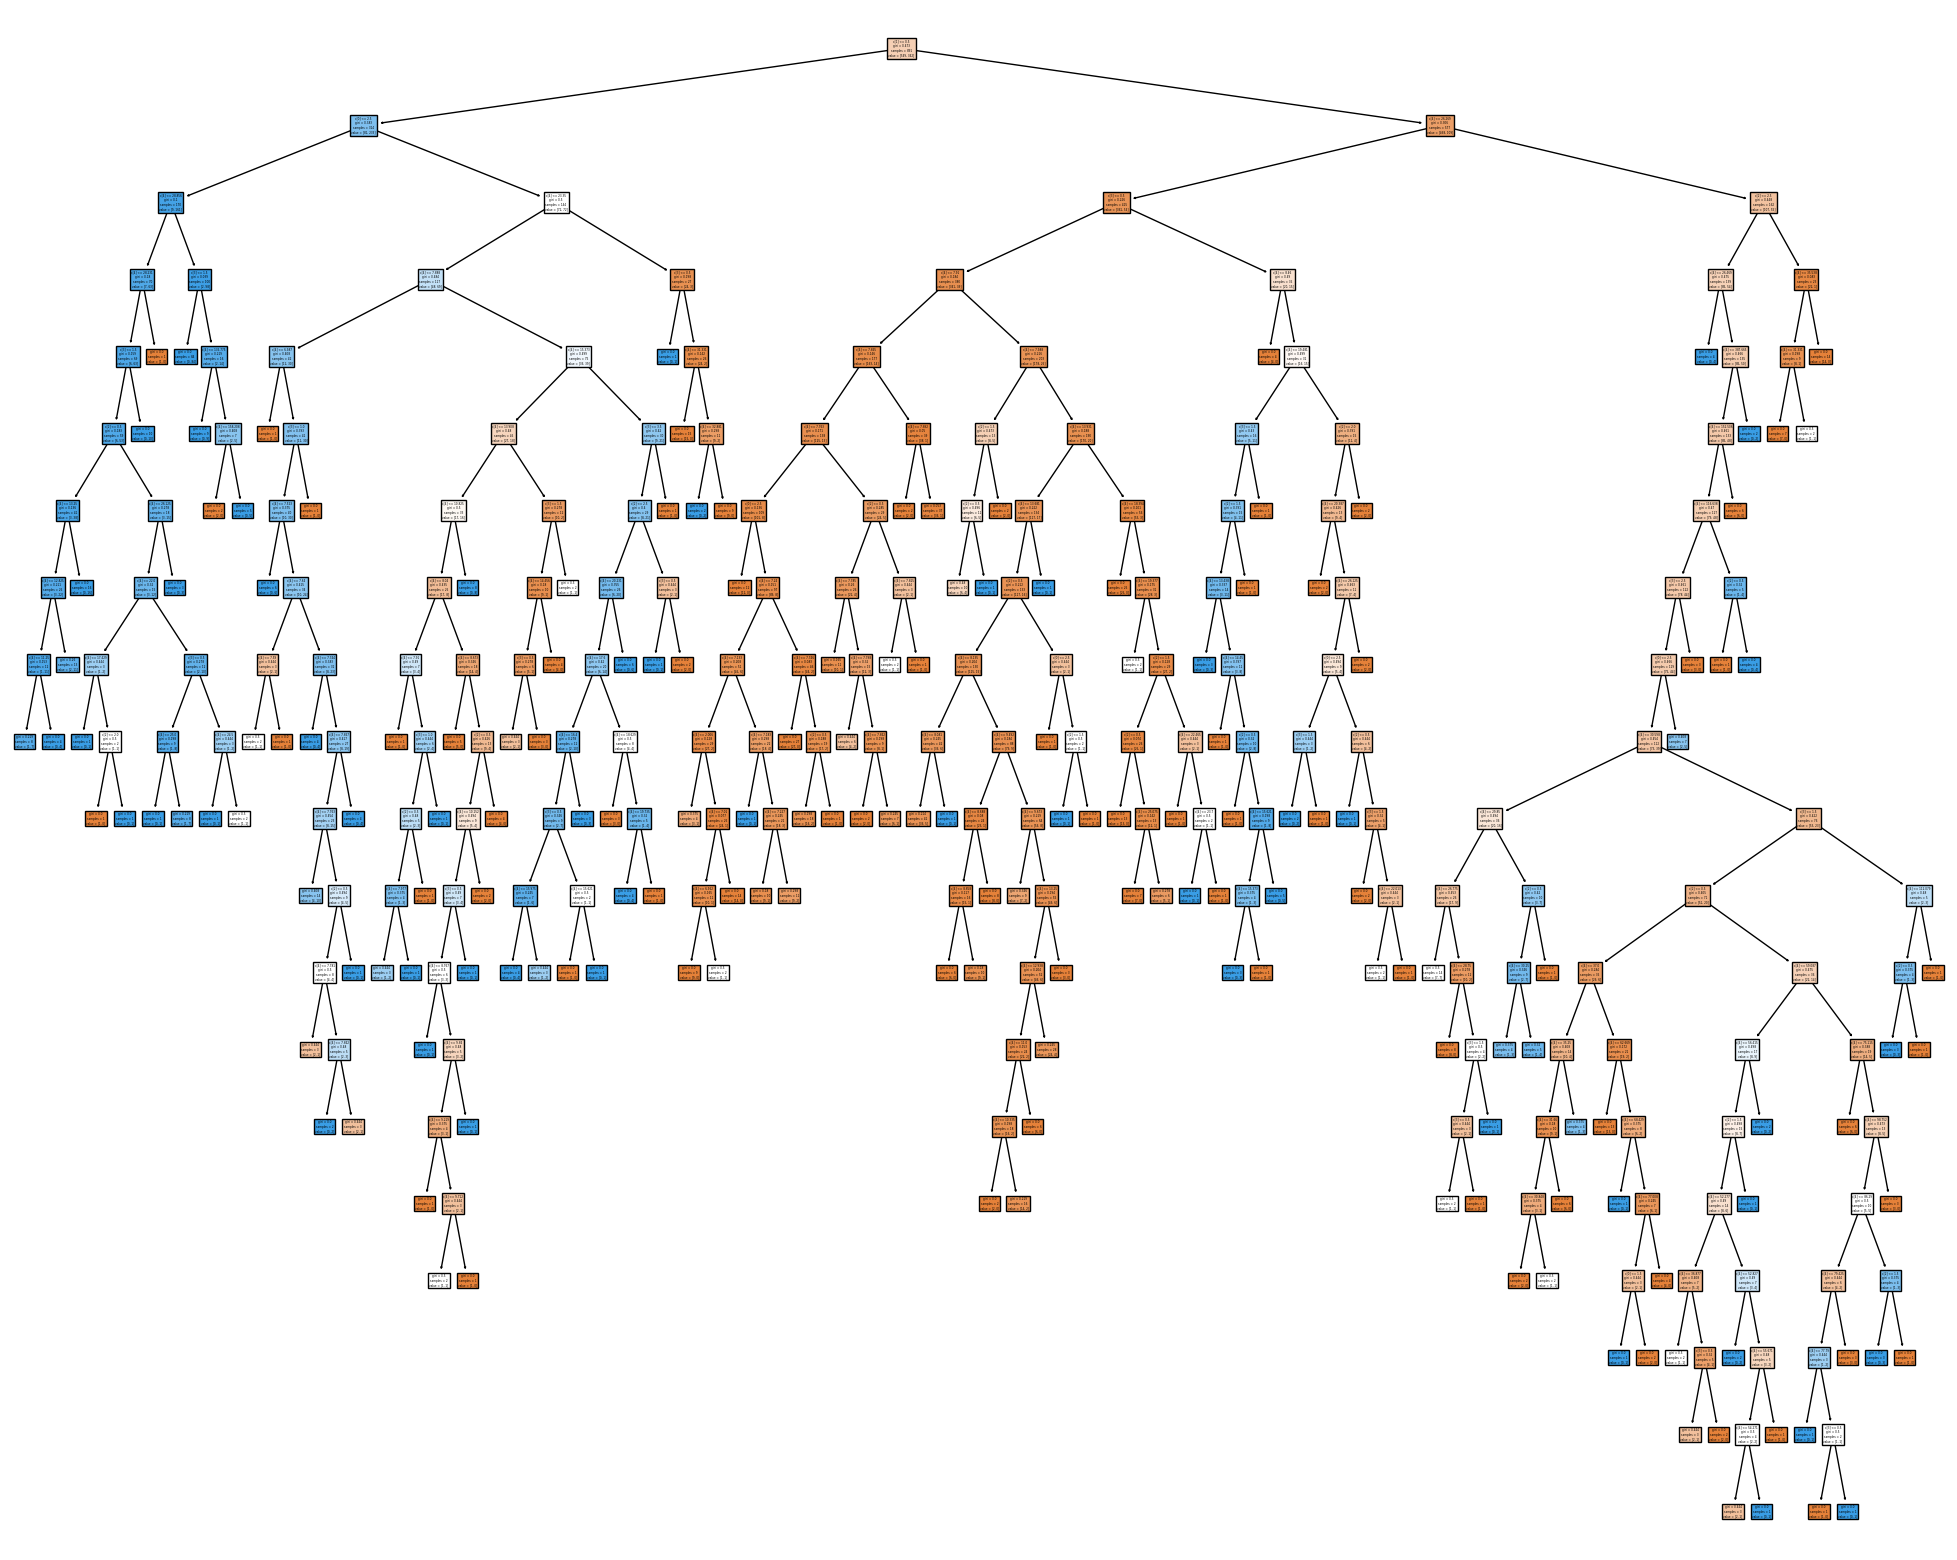

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,20))
plot_tree(model, filled=True)
plt.show()

#### 모형 평가

In [13]:
# 학습 데이터
model.score(X_train, y_train)

0.9225589225589226

In [10]:
# 모형 검증: 평가 데이터
# 학습 데이터와 동일한 처리를 해야 함
test = pd.read_csv('titanic_test.csv', encoding='cp949')
y_test = test.생존여부
X_test = test[['객실등급', '성별', '동반_형제자매배우자', '동반_부모자식', '티켓가격']]
X_test.성별 = X_test.성별.map({'여자':0, '남자':1})

model.score(X_test, y_test)

0.803921568627451

### 과대적합을 줄이는 방법
## 단순모형을 그리자, 데이터의 입력량을 늘리자, 여러 모델(앙상블)을 때려박자